In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import keras.backend as K
import glob
from PIL import Image
from sklearn.model_selection import train_test_split 
#from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from sklearn.metrics import confusion_matrix
#from keras.callbacks import EarlyStopping
from keras.preprocessing import image
import cv2

import re
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000 
from skimage import io
#import labelme
from Img_pro_defs import *
PIXEL = 1080 * 1616
from scipy import ndimage, misc
import keras_segmentation
import imgaug as ia
#import imgaug.augmenters as iaa
from imgaug import augmenters as iaa
import shutil
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [4]:
orig_list = glob.glob('/home/sami/Downloads/Canola Dataset/labeled/Final 98/Aug_ytrain/*.png')
orig_list = sorted_nicely(orig_list)
ytrain = np.asarray(orig_list)
ytestlist = glob.glob('/home/sami/Downloads/Canola Dataset/labeled/Final 98/Aug_ytest/*.png')
ytestlist = sorted_nicely(ytestlist)
ytest = np.asarray(ytestlist)

In [6]:
Ytrain = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in ytrain])
Ytest = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in ytest])

In [27]:
yarancho = np.logical_and(Ytrain[:,:,:,1],Ytrain[:,:,:,2])*1

In [28]:
ya = 2*Ytrain[:,:,:,1] + Ytrain[:,:,:,2] - yarancho

In [29]:
ya.max()

2.0

In [30]:
ybrancho = np.logical_and(Ytest[:,:,:,1],Ytest[:,:,:,2])*1

In [31]:
yb = 2*Ytest[:,:,:,1] + Ytest[:,:,:,2] - ybrancho

In [32]:
yb.max()

2.0

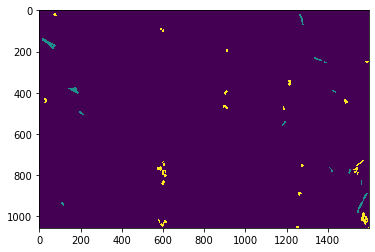

In [10]:
ya=Ytest[:,:,:,2]+Ytest[:,:,:,1]
yb=Ytest[:,:,:,2]+Ytest[:,:,:,1]

In [13]:
Ytest[28,947,366]

array([0., 1., 1.], dtype=float32)

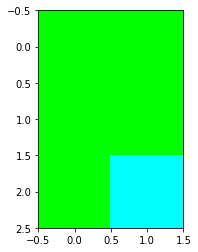

In [20]:
plt.imshow(Ytest[28,945:948,365:367])

In [17]:
Ytest[89+29, 37, 1300]

array([0., 1., 1.], dtype=float32)

In [15]:
ind = np.unravel_index(np.argmax(a[29:], axis=None), a[29:].shape)
ind

(89, 37, 1300)

In [ ]:
#Extracting  Zip file
#import zipfile
#with zipfile.ZipFile("/home/sami/Downloads/Canola Dataset/labeled/Final 98.zip", 'r') as zip_ref:
#    zip_ref.extractall("/home/sami/Downloads/Canola Dataset/labeled/")

In [ ]:
#Saving file name to a list
#Label = glob.glob('/home/sami/Downloads/Canola Dataset/labeled/Final 98/Label/*.png')
##Label = sorted_nicely(Label)
#label = np.asarray(Label)

#save_fname=[]
#for i in range(len(label)):
#    fname = os.path.splitext(os.path.basename(label[i]))[0]+'.png'
 #   save_fname.append(fname)

In [ ]:
#zipping Files 
#import zlib
#import zipfile

"""
def compress(file_names):
    print("File Paths:")
    #print(file_names)

    path = "/home/sami/Downloads/Canola Dataset/labeled/Canola Field/New multiclass/"

    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED

    # create the zip file first parameter path/name, second mode
    zf = zipfile.ZipFile("RAWs.zip", mode="w")
    for file_name in range(len(file_names)):
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
        zf.write(path + file_names[file_name], file_names[file_name], compress_type=compression)
        print(file_names[file_name])

   
        # Don't forget to close the file!
    zf.close()


file_names= save_fname
compress(file_names)"""

In [ ]:
orig_list = glob.glob('/home/sami/Downloads/Canola Dataset/labeled/Final 98/field/*.JPG')
orig_list = sorted_nicely(orig_list)
field = np.asarray(orig_list)

Label = glob.glob('/home/sami/Downloads/Canola Dataset/labeled/Final 98/multiclass/*.png')
Label = sorted_nicely(Label)
label = np.asarray(Label)
#anot_list = glob.glob('/home/sami/Downloads/Canola Dataset/multiclass done/*.png')
#anot_list = sorted_nicely(anot_list)



In [ ]:
"""Label = glob.glob('/home/sami/Downloads/Canola Dataset/labeled/Canola Field/New multiclass/*.png')
Label = sorted_nicely(Label)
label = np.asarray(Label)
from zipfile import ZipFile
labelone = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in label])
"""


In [ ]:

field = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in field])
multiclass = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in label])

In [ ]:
plt.imshow(multiclass[1]/255.0)

In [ ]:
a = (multiclass[:,:,:,1]+multiclass[:,:,:,0])
for  i in range(a.shape[0]):
    if a[i].max()==510:
        print(i)

In [ ]:
weeds = [0,8,21,22,23,24,27,28,29,30,43,46,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,101,102,106,107,108]
weeds = np.asarray(weeds)
crop  = [1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,25,26,31,32,33,34,35,36,37,38,39,40,41,42,44,45,47,66,67,78,99,100,103,104,105]
crop = np.asarray(crop)
len(crop)

In [ ]:
a=multiclass[:,:,:,0]/255.0+2*(multiclass[:,:,:,1]/255.0)

In [36]:
import cv2

outpath = '/home/sami/Downloads/Canola Dataset/labeled/Final 98/ytest_heatmaps'
for i in range(yb.shape[0]):
    
    save_fname = os.path.join(outpath, os.path.splitext(os.path.basename(ytest[i]))[0]+'.png')
    cv2.imwrite(save_fname, yb[i]) 
    # convert to numpy array
print('Image sepration Done')

Image sepration Done


In [ ]:
print(backremoved[4])
print(label[4])

In [ ]:
orig_train, orig_test, anot_train, anot_test = train_test_split(field,multiclass,test_size = 0.15)

In [ ]:
anot_train.shape

In [ ]:
x_train = np.asarray(orig_train)
y_train = np.asarray(anot_train)
x_test = np.asarray(orig_test)
y_test = np.asarray(anot_test)

In [ ]:
#orig_list =[]
#for k, file in enumerate (files):
#    orig_list.append(path + files[k][38:58] + '.JPG')
#orig_train = np.asarray(orig_test)
#anot_train = np.asarray(anot_test)
#orig = orig_train[:]
#anot = anot_train[:]

In [ ]:

Y_train = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in y_train])
X_train = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in x_train])
Y_test = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in y_test])
X_test = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in x_test])


In [ ]:
Y_train[Y_train<200]=0.0
Y_test[Y_test<200]=0.0
Y_train[Y_train>200]=1.0
Y_test[Y_test>200]=1.0

In [ ]:
X_test.max()

In [ ]:
for i in range(Y_train.shape[0]):
    
    Y_train[i]= cv2.medianBlur(Y_train[i], 3)
    if i<Y_test.shape[0]:
        Y_test[i] = cv2.medianBlur(Y_test[i], 3)

    

In [ ]:
Y_train.min()

In [ ]:
plt.imshow(Y_train[26])

In [ ]:
X_train, X_test, Y_train, Y_test = [orig_train, orig_test, anot_train, anot_test]

In [ ]:
Y_train = Y_train/255.0
Y_test  = Y_test/255.0

In [ ]:
X_train, Y_train, X_test, Y_test = augment_high_order (X_train, Y_train, X_test, Y_test,0)

In [ ]:
Y_train.max()

In [ ]:
plt.imshow(Y_train[45])

In [ ]:
outpath = '/home/sami/Downloads/Canola Dataset/labeled/Final 98/Aug_xtrain_field'
for i in range(X_train.shape[0]):
    filenamey=str(i+1328)+str('.jpg')
    cv2.imwrite(os.path.join(outpath , filenamey), X_train[i]) 
    # convert to numpy array
print('Image sepration Done')
    

In [ ]:
outpath = '/home/sami/Downloads/Canola Dataset/labeled/Final 98/Aug_ytrain'
for i in range(Y_train.shape[0]):
    filenamey=str(i+1328)+str('.png')
    cv2.imwrite(os.path.join(outpath , filenamey), Y_train[i]) 
    # convert to numpy array
print('Image sepration Done')

In [ ]:
outpath = '/home/sami/Downloads/Canola Dataset/labeled/Final 98/Aug_xtest'
for i in range(X_test.shape[0]):
    filenamey=str(i+240)+str('.jpg')
    cv2.imwrite(os.path.join(outpath , filenamey), X_test[i]) 
    # convert to numpy array
print('Image sepration Done')

In [ ]:
outpath = '/home/sami/Downloads/Canola Dataset/labeled/Final 98/Aug_ytest'
for i in range(Y_test.shape[0]):
    filenamey=str(i+240)+str('.png')
    cv2.imwrite(os.path.join(outpath , filenamey), Y_test[i]) 
    # convert to numpy array
print('Image sepration Done')

In [ ]:
plt.imshow(Y_test[25])

In [ ]:
anot_list = glob.glob('/home/sami/Semester 3/Datasets/Canola/Ytest/*.png')
anot_list = sorted_nicely(anot_list)
Y_train = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in anot_list])


In [ ]:
X_train.max()

In [ ]:
plt.imshow(X_train[18]/255)

In [ ]:
Y_train[2].max()

In [ ]:
Y_train[:].max()

In [ ]:
Y_train[Y_train<200]=0.0
Y_test[Y_test<200]=0.0
Y_train[Y_train>200]=255.0
Y_test[Y_test>200]=255.0

In [ ]:
plt.imshow(X_train[19])

In [ ]:
ymap=2*(Y_train[:,:,:,0])+Y_train[:,:,:,1]

In [ ]:
ymap=2*(Y_train[:,:,:,0])+Y_train[:,:,:,1]
ymap = np.where(ymap <= 2.0 ,ymap, 0)
ymap.max()

In [ ]:
ymap.max()

In [ ]:
plt.imshow(ymap[20])

In [ ]:
ymap.max()

In [ ]:
for i in range(ymap.shape[0]):
    pathyt='/home/sami/Semester 3/Datasets/Canola/Yheattrain'
    filenamey=str(i)+str('.png')
    print(i)
    cv2.imwrite(os.path.join(pathyt , filenamey), ymap[i])

In [ ]:
ymap=2*(Y_train[:,:,:,0])+Y_train[:,:,:,1]
ymap = np.where(ymap <= 2.0 ,ymap, 0)
ymap.max()

In [ ]:

for i in range(ymap.shape[0]):
    pathyt='/home/sami/Semester 3/Datasets/Canola/Yheattrain'
    filenamey=str(i+928)+str('.png')
    print(i)
    cv2.imwrite(os.path.join(pathyt , filenamey), ymap[i])

In [ ]:
for i in range(X_train.shape[0]):
    
    pathxt = '/home/sami/Semester 3/Datasets/Canola/Xtrain'
    pathyt = '/home/sami/Semester 3/Datasets/Canola/Ytrain'
    filenamex=str(i+928)+str('.jpg')
    filenamey=str(i+928)+str('.png')
    cv2.imwrite(os.path.join(pathxt , filenamex), X_train[i])
    cv2.imwrite(os.path.join(pathyt , filenamey), Y_train[i]*255)

In [ ]:
print(i)

In [ ]:
for i in range(X_test.shape[0]):
    
    pathxt = '/home/sami/Semester 3/Datasets/Canola/Xtest'
    pathyt = '/home/sami/Semester 3/Datasets/Canola/Ytest'
    filenamex=str(i+176)+str('.jpg')
    filenamey=str(i+176)+str('.png')
    print(i)
    cv2.imwrite(os.path.join(pathxt , filenamex), X_test[i])
    cv2.imwrite(os.path.join(pathyt , filenamey), Y_test[i]*255)

In [ ]:
for i in range(X_test.shape[0]):
    
    pathxt = '/home/sami/Semester 3/Datasets/Canola/Xtest'
    pathyt = '/home/sami/Semester 3/Datasets/Canola/Ytest'
    filename=str(i+176)+str('.jpg')
    cv2.imwrite(os.path.join(pathxt , filename), X_test[i])
    cv2.imwrite(os.path.join(pathyt , filename), Y_test[i]*255)

In [ ]:
for i in range(X_test_b.shape[0]):
    
    pathxt = '/home/sami/Semester 3/Datasets/Canola/Xtest'
    pathyt = '/home/sami/Semester 3/Datasets/Canola/Ytest'
    filenamex=str(i+220)+str('.jpg')
    filenamey=str(i+220)+str('.png')
    cv2.imwrite(os.path.join(pathxt , filenamex), X_test_b[i])
    cv2.imwrite(os.path.join(pathyt , filenamey), Y_test_b[i]*255)

In [ ]:
filename=str(2)+str('.jpg')
print(filename)

In [ ]:
X_train, Y_train, X_test, Y_test = augment_high_order (X_train, Y_train, X_test, Y_test,1)

In [ ]:
Y_train.shape

In [ ]:
plt.imshow(Y_train[11].max())

In [ ]:
plt.imshow(X_train[11]/255)

In [ ]:
Y_train[10,400:600,1527:,2].max()

In [ ]:
X_train = np.concatenate((X_train,X_test,X_train_b,X_test_b), axis = 0)
Y_train = np.concatenate((Y_train,Y_test,Y_train_b,Y_test_b), axis = 0)


In [ ]:
del X_test,Y_test,X_train,Y_train,X_train_b,Y_train_b

In [ ]:
plt.imshow(X_train[270]/255)

In [ ]:
plt.imshow(Y_train[270])

In [ ]:
plt.imshow(Y_train[177])

In [ ]:
print (X_train.shape)
print (Y_train.shape)
#print (X_test.shape)
#print (Y_test.shape)

In [ ]:
write_nicely(X_train,1,'Data/canola/aug_test/images')
write_nicely(Y_train,1,'Data/canola/aug_test/heatmaps')   
#write_nicely(X_test,1,'Data/aug_test/images')
#write_nicely(Y_test,1,'Data/aug_test/heatmaps') 

In [ ]:
for k in range (X_test.shape[0]):
    cv2.imwrite('Data/aug_test/' + k + '.png',X_test[k])
    cv2.imwrite('Data/aug_test/' + k + '.png',Y_test[k])

In [ ]:
plt.imshow(images_aug[12])
cv2.imwrite('aug.png',images_aug[12])

In [ ]:
plt.imshow(heatmaps_aug[12])

In [ ]:
for k in range (len(files)):
    
    cv2.imwrite('Data/temp2/fredericks_204_205/30_05_2019/' + files[k][38:58] +'.png',anot[k]/255)
    cv2.imwrite('Data/temp1/fredericks_204_205/30_05_2019/' + files[k][38:58] +'.png',orig[k])
    

In [ ]:
!nvidia-smi

In [ ]:
model = keras_segmentation.models.unet.vgg_unet(n_classes=2 ,  input_height=1056, input_width=1600  )

model.train( 
    train_images =  "Data/train/",
    train_annotations = "Data/anot/",
  
    checkpoints_path = "ckpt/" , epochs= 10
)

 #val_images="Data/test set/test/",
   # val_annotations="Data/test set/anot/",


In [ ]:
files = glob.glob('Data/test set/*.JPG')
orig = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in files])

#orig1 = orig.reshape(1056,1600,3)
plt.imshow(orig[0]/255.)

In [ ]:
files = glob.glob('Data/test set/test/*.png')
files1 = glob.glob('Data/test set/anot/*.png')
orig = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in files])
anot = np.array([image.img_to_array(image.load_img(fname,target_size = (1056,1600))) for fname in files1])
#orig1 = orig.reshape(1056,1600,3)
plt.imshow(orig[0]/255.)

In [ ]:
anot.shape

In [ ]:
cv2.imwrite('Data/test set/PICT_20190530_142214.png',orig[1])

In [ ]:
out = model.predict_segmentation(
    inp="Data/test set/PICT_20190530_142214.png",
    out_fname="Data/test set/test2.png"
)


import matplotlib.pyplot as plt
plt.imshow(out*255)

# cv2.imwrite('Data/test set/2223.png',out*255)

In [ ]:
path = 'Data/Masks/fredericks_204_205/30_05_2019'
path1 = 'Data/Back_rm/Fred_204_205/30-05-2019'
path2 = 'Data/temp/fredericks_204_205/30_05_2019'

In [ ]:
csv_file = pd.read_csv('Data/Originals/Fred_204_205/30-05-2019/Fredericks 204-205 South.csv')

In [ ]:
files = glob.glob('Data/Back_rm/Fred_204_205/30-05-2019/*.JPG')
data = crop_pixel_counter (files, csv_file, 20, 3)
files = glob.glob('Data/temp/fredericks_204_205/30_05_2019/*.png')
files = sorted_nicely(files)


for k, file in enumerate (files):
    image = cv2.imread (file)
    image[image != 0] = 1
    weed_percent =count_nonblack_np(image)/PIXEL*100
    print (weed_percent)
    data['Weed Leaves Area'][files[k][40:60] + '.JPG'] = weed_percent
    data['Crop Leaves Area'][files[k][40:60] + '.JPG'] = data['Crop Leaves Area'][files[k][40:60] + '.JPG'] - weed_percent

    
data.to_csv('Data/CSV/fredericks_204_205/30_05_2019/Fredericks 204-205 South.csv')    
data





        
    

In [ ]:
data.loc['PICT_20190530_150019.JPG']

In [ ]:
image = cv2.imread ('Data/Back_rm/Fred_204_205/30-05-2019/PICT_20190530_142058.JPG')

In [ ]:
image1 = cv2.imread ('Data/temp/fredericks_204_205/30_05_2019/PICT_20190530_142058.png')

In [ ]:
image = cv2.imread ('Data/Back_rm/Fred_204_205/30-05-2019/PICT_20190530_152239.JPG')
image = thresholding(image,20)
image = median_filter(image,5)
image[image!=0] = 1
image.sum()

In [ ]:
cv2.imwrite('result2.png',255*image)

In [ ]:
my_image.sum()/PIXEL*100

In [ ]:
from PIL import Image

img = Image.open('Data/temp/fredericks_204_205/30_05_2019/PICT_20190530_142110.png')

In [ ]:
arr = (np.asarray(img))
s = arr.sum(-1)

In [ ]:
s[s!=0]=1
s.sum()/PIXEL*100

In [ ]:
files = glob.glob('Data/temp/fredericks_204_205/30_05_2019/*.png')


In [ ]:
files = glob.glob('Data/temp/fredericks_204_205/30_05_2019/*.png')
files = sorted_nicely(files)
for k, file in enumerate (files):
    index = 
    image = cv2.imread (file)
    image[image != 0] = 1
    crop_percent = image.sum()/PIXEL*100
    data['Crop %age'][files[0][40:60] + '.JPG'] = crop_percent/3

In [ ]:
def weed_pixel_counter (files, data):
    files = sorted_nicely(files)
    data = data.set_index('filename')
    data['Crop %age'] = 0
    data['Weed %age'] = 0
    for k, file in enumerate (files):
        image = cv2.imread (file)
        image[image != 0] = 1
        crop_percent = image.sum()/PIXEL*100
        data['Crop %age'][k] = crop_percent
    return data